# Analysis Notebook

## Input parameters
- `dataset` - The name of the dataset to load. Use "strava-activities" or "strava-activities-subset"

In [1]:
dataset = 'strava-activities-subset'

## Analysis

Import libaries

In [2]:
from pyspark.sql.functions import round, sum, coalesce
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

Load dataset

In [3]:
df = sqlContext.read.parquet('s3n://larsbk/%s/parquet/point/' % dataset)
dfa = sqlContext.read.parquet('s3n://larsbk/%s/parquet/block/' % dataset)

sqlContext.registerDataFrameAsTable(df, 'point')
sqlContext.registerDataFrameAsTable(dfa, 'block')

Let's do this!
### Speed histogram

In [4]:
pdf = sqlContext.sql(
"""
  SELECT 
    round(p_speed_kmh) AS speed_int,
    sum(coalesce(p_diff_time_seconds,0)) AS seconds_with_speed
  FROM
    point
  WHERE
    activity_type = 'Ride'
  GROUP BY
    round(p_speed_kmh)
"""
).toPandas()

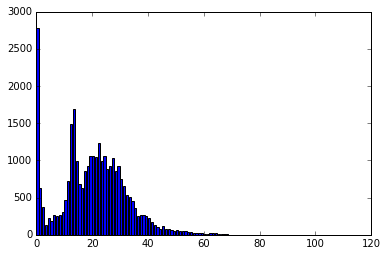

In [5]:
plt.bar(pdf['speed_int'], pdf['seconds_with_speed']);